# Mapeando el Universo



## Aprendizaje Supervisado

### 01 - Lectura de datos

In [1]:
# Iportamos librerìas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
from sklearn import datasets, linear_model
from sklearn.linear_model import (LinearRegression, SGDClassifier, Ridge, SGDRegressor)
from sklearn.preprocessing import (PolynomialFeatures, MinMaxScaler)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import (train_test_split, KFold, GridSearchCV)
from sklearn.metrics import (mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import os
import gc
import sys
import pkg_resources
import warnings
warnings.filterwarnings('ignore')

In [2]:
if 'psutil' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install psutil
if 'scikit-learn' not in {pkg.key for pkg in pkg_resources.working_set}:
    !pip install scikit-learn
in_colab = 'google.colab' in sys.modules

def Memory():
    """Imprime la cantidad de memoria RAM utilizada por el proceso 
    hasta el momento, en GB"""
    gc.collect()
    process = psutil.Process(os.getpid())
    print('Memoria actual utilizada: %.2f GB' %(process.memory_full_info().rss*1e-9))
    return

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
filename = "dataset/data_filter.csv"

In [5]:
data = pd.read_csv(filename,index_col=0)

In [6]:
data.describe()

,z,velDisp,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroMag_u,...,subClass_STARFORMING_BROADLINE,subClass_null,modelColor_ug,modelColor_gr,modelColor_ri,modelColor_iz,petroColor_ug,petroColor_gr,petroColor_ri,petroColor_iz
count,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,...,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000,608921.000000
mean,0.104342,135.548575,184.663017,25.119669,19.486345,17.820442,16.964847,16.554727,16.264905,19.482649,...,0.001363,0.590323,1.665904,0.855595,0.410120,0.289823,1.615551,0.831818,0.386924,0.233235
std,0.053560,74.773948,58.737151,19.010990,0.960267,0.763514,0.675561,0.673814,0.707239,1.157991,...,0.036895,0.491775,0.458326,0.296790,0.097406,0.179993,0.799674,0.352273,0.220364,0.373315
min,-0.006568,0.000000,0.001718,-11.252825,14.226100,13.574420,13.890400,13.758980,12.382540,11.984880,...,0.000000,0.000000,-9.993700,-6.423580,-4.947020,-13.819450,-19.256860,-3.612750,-22.090000,-21.056590
25%,0.066619,83.816160,151.925664,9.675502,18.901570,17.420410,16.635270,16.226100,15.916920,18.858070,...,0.000000,0.000000,1.343030,0.675080,0.373660,0.248440,1.239470,0.639410,0.350710,0.188920
50%,0.097589,131.624900,185.461795,23.769607,19.528360,17.971860,17.157480,16.737970,16.430190,19.460280,...,0.000000,1.000000,1.718690,0.875560,0.422390,0.315140,1.542990,0.843520,0.404890,0.271040
75%,0.136380,181.387900,220.488190,39.551447,20.146590,18.358100,17.474630,17.051040,16.752250,20.062810,...,0.000000,1.000000,1.938110,1.022410,0.463140,0.353350,1.817090,0.995580,0.445390,0.324840
max,1.000208,850.000000,359.997379,70.268882,30.599800,28.401410,25.141300,20.176000,28.553240,41.270800,...,1.000000,1.000000,13.198990,13.050000,9.648550,5.005140,24.066280,19.110600,4.211290,19.374340


In [7]:
data.columns

Index(['z', 'velDisp', 'ra', 'dec', 'subClass', 'modelMag_u', 'modelMag_g',
       'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroMag_u', 'petroMag_g',
       'petroMag_r', 'petroMag_i', 'petroMag_z', 'deVRad_u', 'deVRad_g',
       'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r',
       'expRad_i', 'expRad_z', 'petroRad_u', 'petroRad_g', 'petroRad_r',
       'petroRad_i', 'petroRad_z', 'spiral', 'elliptical', 'uncertain',
       'subClass_AGN', 'subClass_AGN_BROADLINE', 'subClass_BROADLINE',
       'subClass_STARBURST', 'subClass_STARBURST_BROADLINE',
       'subClass_STARFORMING', 'subClass_STARFORMING_BROADLINE',
       'subClass_null', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri',
       'modelColor_iz', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri',
       'petroColor_iz'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608921 entries, 957075158303008768 to 957064712942544896
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   z                               608921 non-null  float64
 1   velDisp                         608921 non-null  float64
 2   ra                              608921 non-null  float64
 3   dec                             608921 non-null  float64
 4   subClass                        249461 non-null  object 
 5   modelMag_u                      608921 non-null  float64
 6   modelMag_g                      608921 non-null  float64
 7   modelMag_r                      608921 non-null  float64
 8   modelMag_i                      608921 non-null  float64
 9   modelMag_z                      608921 non-null  float64
 10  petroMag_u                      608921 non-null  float64
 11  petroMag_g                      608921 non-null  

### 02 - Set de datos

In [9]:
#-- Jugar con esta lista, agregar o sacar o cambiar las columnas.

filter_col=[];
filter_col.extend([col for col in data if col.startswith(('modelMag', 'modelColor','deVRad','expRad','velDisp', 'z'))])

filter_colp=[]
filter_colp.extend([col for col in data if col.startswith(('petroMag', 'petroColor','petroRad','velDisp', 'z'))])

## las columnas de esta lista  
filter_col_sre=[];
filter_col_sre.extend([col for col in data if col.startswith(('modelMag', 'modelColor','velDisp', 'z'))])

filter_col07=[]
filter_col07=[ 'z','petroColor_gr', 'modelColor_ri', 'modelColor_gr','petroMag_r','petroMag_g','petroMag_u',
                    'modelMag_i','modelMag_g','modelMag_u','modelMag_r','velDisp']


In [10]:
print(filter_col)
print(filter_colp)
print(filter_col_sre)
print(filter_col07)

['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'deVRad_u', 'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i', 'expRad_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']
['z', 'velDisp', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z', 'petroColor_ug', 'petroColor_gr', 'petroColor_ri', 'petroColor_iz']
['z', 'velDisp', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'modelColor_ug', 'modelColor_gr', 'modelColor_ri', 'modelColor_iz']
['z', 'petroColor_gr', 'modelColor_ri', 'modelColor_gr', 'petroMag_r', 'petroMag_g', 'petroMag_u', 'modelMag_i', 'modelMag_g', 'modelMag_u', 'modelMag_r', 'velDisp']


### 03- Visualización de datos
* Graficos de dispersión de las variables usadas vs redshift

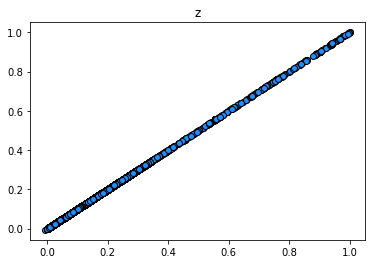

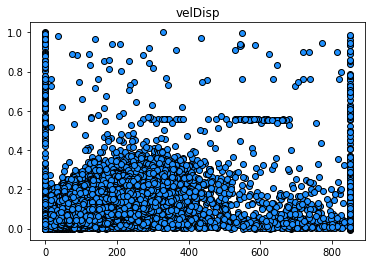

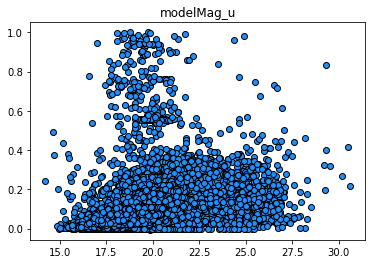

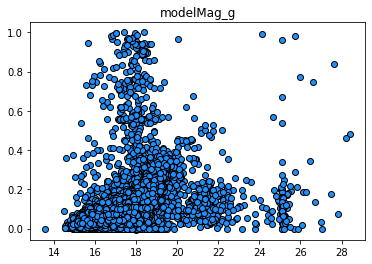

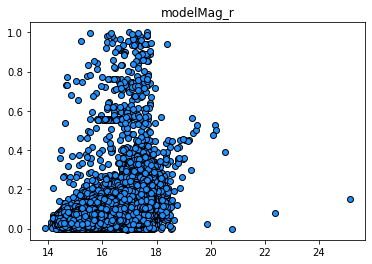

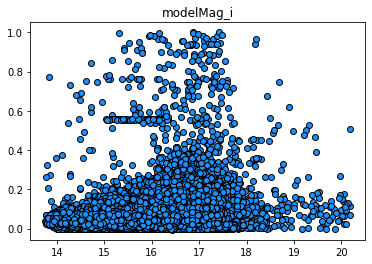

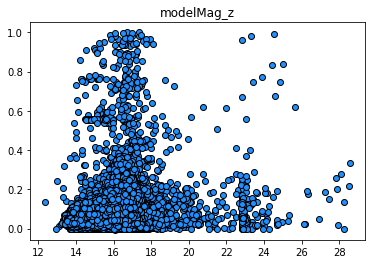

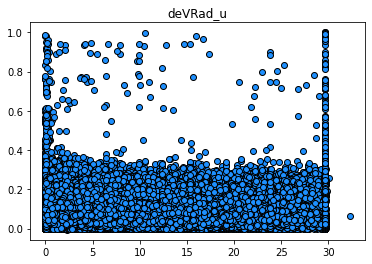

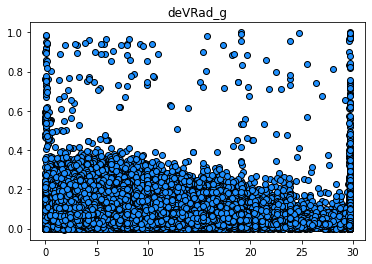

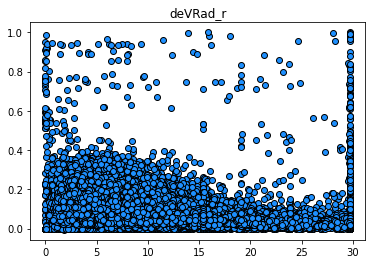

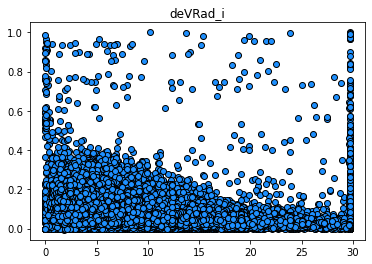

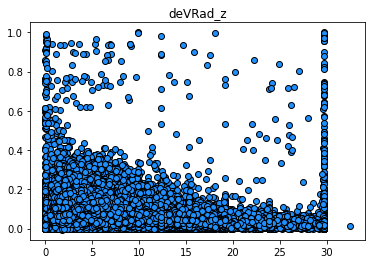

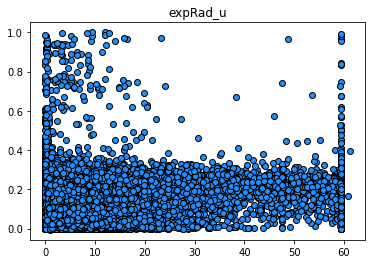

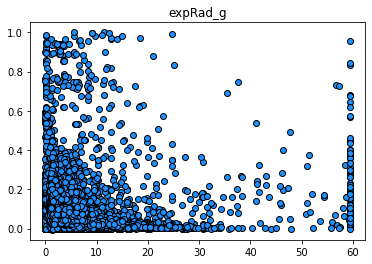

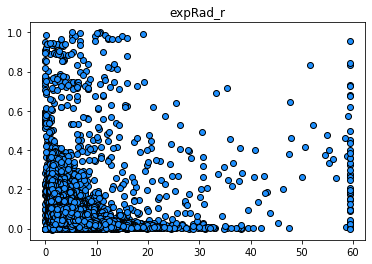

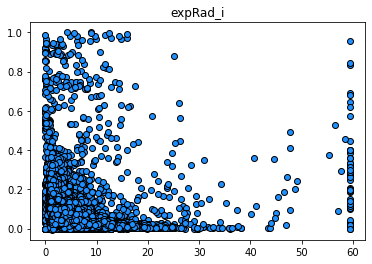

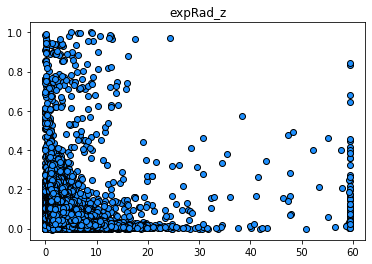

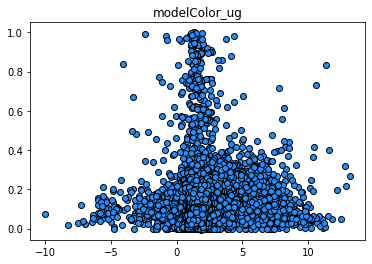

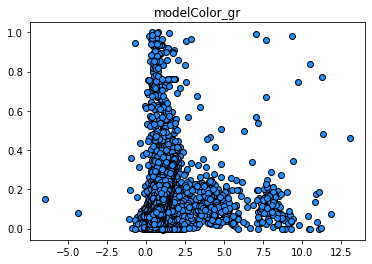

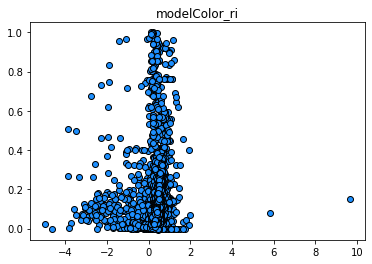

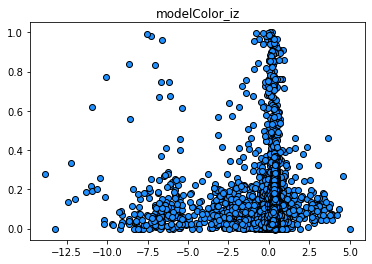

In [11]:
for i in filter_col:
    plt.scatter(data[i],data['z'], facecolor="dodgerblue", edgecolor="k", label="datos")
    plt.title(i)
    plt.show()

### 04- Clasificación del tipo morfológico de galaxias
  * Implementar los modelos random forest y redes neuronales para clasificar las galaxias en tipo Elípticas y Espirales e Irregulares
    + Utilizar al menos dos subconjuntos diferentes de variables (uno puede ser el mejor conjunto que les resultó del práctico anterior)
    + Realizar una búsqueda en grilla de los mejores parámetros de los modelos empleados.
    + Comparar la performance con los modelos de:
        * perceptrón,
        * regresión logística,
        * vecinos más cercanos 
        * o el que hayan utilizado en el práctico anterior.

In [12]:
data['morfologia'] = 'uncertain'
data.loc[data['elliptical']==1, 'morfologia'] = 'elliptical'
data.loc[data['spiral']==1, 'morfologia'] = 'spiral'
data['morfologia']

specObjID
957075158303008768     uncertain
957066087332079616     uncertain
957065537576265728        spiral
957066911965800448    elliptical
693629150375733248     uncertain
                         ...    
957075708058822656     uncertain
957077632204171264     uncertain
957077357326264320        spiral
957066637087893504        spiral
957064712942544896     uncertain
Name: morfologia, Length: 608921, dtype: object

### 04-1. Modelo: RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [14]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 200, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [15]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [16]:
X, y = data[filter_col[1:]], data['morfologia']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(len(X_train))
X_train_reduced = X_train[0:10000]
y_train_reduced = y_train[0:10000]

487136


In [ ]:
model = RandomForestClassifier()

rf_random = GridSearchCV(model, random_grid, n_jobs=-1 , verbose=10 )

rf_random.fit(X_train_reduced,y_train_reduced)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

In [ ]:
print(rf_random.best_params_)

In [ ]:
best_random_rf = rf_random.best_estimator_
y_train_pred = best_random_rf.predict(X_train_reduced)
y_test_pred = best_random_rf.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

In [ ]:
best_random_rf.fit(X_train, y_train)

In [ ]:
y_train_pred = best_random_rf.predict(X_train_reduced)
y_test_pred = best_random_rf.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

### 04-2. Modelo: Red neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose=10)
clf.fit(X_train_reduced, y_train_reduced)

In [ ]:
print(clf.best_params_)

In [ ]:
best_random_mlpc = clf.best_estimator_
y_train_pred = best_random_mlpc.predict(X_train_reduced)
y_test_pred = best_random_mlpc.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

In [ ]:
best_random_mlpc.fit(X_train, y_train)

In [ ]:
y_train_pred = best_random_mlpc.predict(X_train_reduced)
y_test_pred = best_random_mlpc.predict(X_test)

print('Train Accuracy: ', np.sum(y_train_pred == y_train_reduced)/len(y_train_reduced))
print('Test Accuracy: ', np.sum(y_test_pred == y_test)/len(y_test))

### 04-3. Comparación: respecto a los modelos anteriores

**NOTAS:**
* Vemos una mejoría respecto al **modelo SGDC** utilizado en el práctico anterior. 
* Esta mejora es de aproximadamente 10% respecto a los resultados obtenidos con el modelo anterior. 
* Barriendo mayor cantidad de parámetros y entrenando con el dataset completo, estos números pueden mejorarse.
* DATOS:
    + SGDC (trabajo anterior): Test accuracy: 0.6920  
    + RF Tree (cv search)    : Test accuracy: 0.7521  
    + MLPC (cv search)       : Test accuracy: 0.7261  

### 05- Determinación del _redshift_ de las galaxias

  * Implementar los modelos de random forest, multi-layer perceptron y/o stochastic gradient descent para determinar el _redshift_ de las galaxias a partir de las propiedades fotométricas.
  
    + Utilizar al menos dos subconjuntos diferentes de variables (uno puede ser el mejor conjunto que les resultó del práctico anterior)
    + Determinar cuales son los parámetros de los algoritmos más importantes y realizar una búsqueda en grilla de los mejores parámetros de los modelos empleandos.
    + Elijan un métrica para evaluar el rendimiento de los métodos.
    
**NOTA**: No olviden realizar la división del dataset en un conjunto de entrenamiento y de test.
    
   